In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import math
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
df = pd.read_excel("Xiomi data.xlsx")

In [8]:
#previewing the data
df.head()

,TXNID,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668
1,2,Saturday,Chrome,15,5,16.9,3469
2,3,Monday,Internet Explorer,20,6,7.3,5215
3,4,Monday,Chrome,42,6,30.1,10423
4,5,Saturday,Internet Explorer,20,6,13.3,5404


In [9]:
#checking the size
df.shape

(43200, 7)

In [10]:
#checking for data type
df.dtypes

TXNID                   int64
Day                    object
Browser                object
No. of Clicks           int64
Pages Viewed            int64
Time (min)            float64
Amount Spent (Rs.)      int64
dtype: object

In [11]:
#performing descriptive statistics
df.describe()

,TXNID,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
count,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000
mean,21600.500000,23.740000,4.820000,12.810000,6812.820000
std,12470.910151,8.267647,2.016853,6.002444,3201.905731
min,1.000000,8.000000,2.000000,4.300000,1784.000000
25%,10800.750000,18.000000,3.000000,8.500000,4473.000000
50%,21600.500000,22.500000,4.500000,11.400000,6215.000000
75%,32400.250000,29.000000,6.000000,15.100000,8412.000000
max,43200.000000,46.000000,10.000000,32.900000,15851.000000


In [12]:
#performing skewness
df.skew()

TXNID                 0.000000
No. of Clicks         0.677900
Pages Viewed          0.626857
Time (min)            1.406018
Amount Spent (Rs.)    1.017343
dtype: float64

In [13]:
# mode
df.mode()

,TXNID,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Friday,Chrome,20.0,4.0,8.0,1784.0
1,2,NaN,NaN,NaN,NaN,9.6,2668.0
2,3,NaN,NaN,NaN,NaN,11.3,2791.0
3,4,NaN,NaN,NaN,NaN,11.4,3269.0
4,5,NaN,NaN,NaN,NaN,11.8,3273.0
...,...,...,...,...,...,...,...
43195,43196,NaN,NaN,NaN,NaN,NaN,NaN
43196,43197,NaN,NaN,NaN,NaN,NaN,NaN
43197,43198,NaN,NaN,NaN,NaN,NaN,NaN
43198,43199,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#kurtosis
df.kurt()

TXNID                -1.200000
No. of Clicks         0.025564
Pages Viewed          0.034871
Time (min)            2.053011
Amount Spent (Rs.)    0.673882
dtype: float64

In [15]:
df['No. of Clicks'].describe()

count    43200.000000
mean        23.740000
std          8.267647
min          8.000000
25%         18.000000
50%         22.500000
75%         29.000000
max         46.000000
Name: No. of Clicks, dtype: float64

(array([ 864.,    0.,  864., 1728.,    0., 2592., 2592., 2592., 2592.,
        5184.,  864., 4320., 4320.,  864.,  864.,  864., 2592.,  864.,
        2592.,    0.,  864.,    0., 1728.,  864.,    0.,  864.,  864.,
           0.,    0.,  864.]),
 array([ 8.        ,  9.26666667, 10.53333333, 11.8       , 13.06666667,
        14.33333333, 15.6       , 16.86666667, 18.13333333, 19.4       ,
        20.66666667, 21.93333333, 23.2       , 24.46666667, 25.73333333,
        27.        , 28.26666667, 29.53333333, 30.8       , 32.06666667,
        33.33333333, 34.6       , 35.86666667, 37.13333333, 38.4       ,
        39.66666667, 40.93333333, 42.2       , 43.46666667, 44.73333333,
        46.        ]),
 <BarContainer object of 30 artists>)

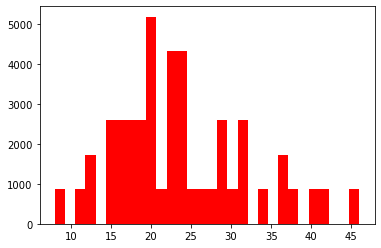

In [16]:
#visualising no. of clicks with histogram using matplotlib
plt.hist(df['No. of Clicks'],bins=30,color= 'red')

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='No. of Clicks', ylabel='Density'>

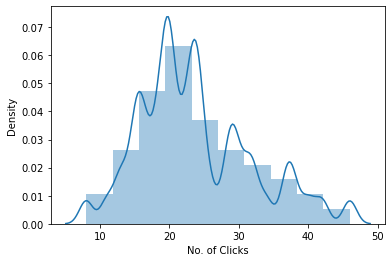

In [17]:
# visualization using seaborn
sns.distplot(df['No. of Clicks'],bins= 10)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee154e3cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee155323d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee154e3970>],
 'medians': [<matplotlib.lines.Line2D at 0x1ee15532a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ee15532df0>],
 'means': []}

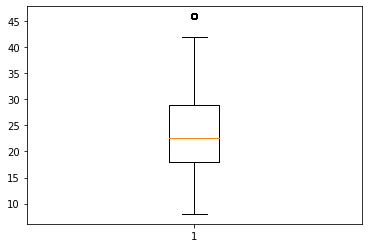

In [18]:
#viz no. of clicks with boxplot using matplotlib
plt.boxplot(df['No. of Clicks'])

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No. of Clicks'>

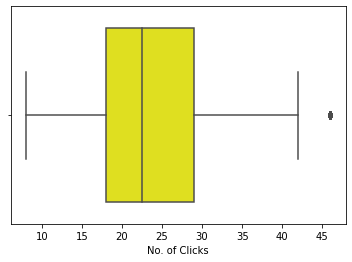

In [19]:
#viz with boxplot using seaborn
sns.boxplot(df['No. of Clicks'],color='yellow')

Text(0, 0.5, 'amount spent')

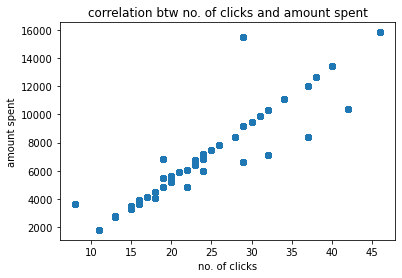

In [20]:
#performing scatter graph using matplotlib
plt.scatter(df['No. of Clicks'],df['Amount Spent (Rs.)'])
plt.title('correlation btw no. of clicks and amount spent')
plt.xlabel("no. of clicks")
plt.ylabel("amount spent")
                                

C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'correlation btw no. of clicks and amount spent')

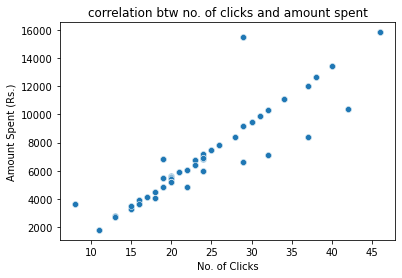

In [21]:
#performing scatter using seaborn
sns.scatterplot(df['No. of Clicks'],df['Amount Spent (Rs.)'])
plt.title('correlation btw no. of clicks and amount spent')


C:\Users\aasth\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='No. of Clicks', ylabel='Amount Spent (Rs.)'>

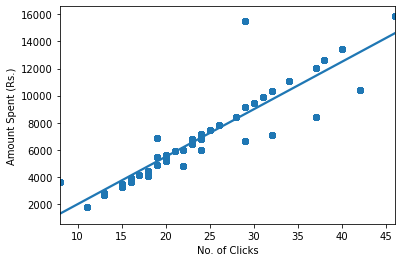

In [22]:
#trend line/ regression line in scatter plot
sns.regplot(df['No. of Clicks'],df['Amount Spent (Rs.)'])

In [23]:
# performing correlation matrix
correl = df.corr()

In [24]:
correl

,TXNID,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
TXNID,1.000000,0.002474,0.000821,-0.001407,0.002682
No. of Clicks,0.002474,1.000000,0.566934,0.516365,0.903248
Pages Viewed,0.000821,0.566934,1.000000,0.595568,0.723667
Time (min),-0.001407,0.516365,0.595568,1.000000,0.580048
Amount Spent (Rs.),0.002682,0.903248,0.723667,0.580048,1.000000


<AxesSubplot:>

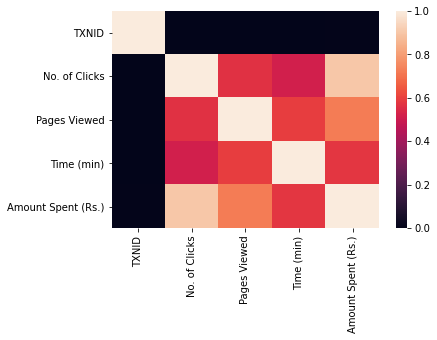

In [25]:
# visualizing correlation matrix through heatmap
sns.heatmap(correl)


# steps to build predictive model
### 1. import the relavant library- sklearn
### 2. separate x and y variables and store
### 3. store linear regression function which is obtained from sklearn and store it in a small variable
### 4. build / fit the model with x and y
### 5. predict the model and get new predictive values
### 6. evaluate the model using R2 and RMSE

In [26]:
#separate x and y
x=df.iloc[:,3]

In [27]:
x.head()

0    13
1    15
2    20
3    42
4    20
Name: No. of Clicks, dtype: int64

In [28]:
# converting the above list into dataframe
x= pd.DataFrame(x)

In [29]:
x.head()

,No. of Clicks
0,13
1,15
2,20
3,42
4,20


In [30]:
 # x=df['No. of clicks'].copy()

In [31]:
y= df["Amount Spent (Rs.)"].copy()

In [32]:
y= pd.DataFrame(y)

In [33]:
y.head()

,Amount Spent (Rs.)
0,2668
1,3469
2,5215
3,10423
4,5404


In [34]:
# storing linear regression in small variable
lr= LinearRegression()

In [35]:
# building/fitting model
lr.fit(x,y)

LinearRegression()

In [36]:
# predicting the model
y_pred= lr.predict(x)

# Evaluation using R2 and RMSE


In [37]:
r2= r2_score(y, y_pred)

In [38]:
r2

0.8158570887617314

In [39]:
mse= mean_squared_error(y,y_pred)

In [40]:
mse

1887826.3104436423

In [41]:
rmse = math.sqrt(mse)

In [42]:
rmse

1373.9819178008283

In [43]:
print("the r2 for the model is :",r2)
print("the rmse for model is :", rmse)

the r2 for the model is : 0.8158570887617314
the rmse for model is : 1373.9819178008283


# Using train test split

In [44]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=30)

In [45]:
lr.fit(x_train,y_train)

LinearRegression()

In [46]:
y_new= lr.predict(x_test)

In [47]:
r2_score(y_test,y_new)

0.8033007932635212

# Cross validation

In [48]:
scores= cross_val_score(lr,x,y,cv= 10)

In [49]:
scores

array([0.81680945, 0.81736106, 0.80586331, 0.81328719, 0.82745332,
       0.81684496, 0.80860505, 0.81655746, 0.8168865 , 0.81861607])

In [50]:
np.mean(scores)

0.8158284368146592

In [51]:
np.std(scores)

0.00553934380869279

# Implementing lasso & Ridge

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [59]:
la= Lasso(alpha=1)
rd= Ridge(alpha=130)

In [60]:
params= {'alpha' : [1e-15,1e-12,1e-10,1e-8,1e-6,1e-4,1e-2,1,2,3,4,5,6,7, 8,9,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,
                   170,180,190,200,300,400,500,600]}

In [61]:
tuned_lasso= GridSearchCV(estimator= la,param_grid=params)
tuned_ridge= GridSearchCV(estimator=rd,param_grid= params)

In [62]:
tuned_lasso.fit(x,y)
tuned_ridge.fit(x,y)

C:\Users\aasth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32628354866.86463, tolerance: 35379961.44891897
  model = cd_fast.enet_coordinate_descent(
C:\Users\aasth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32344584164.75955, tolerance: 35433550.94990335
  model = cd_fast.enet_coordinate_descent(
C:\Users\aasth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32977850661.051514, tolerance: 35532309.36831833
  model = cd_fast.enet_coordinate_descent(
C:\Users\aasth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarni

GridSearchCV(estimator=Ridge(alpha=130),
             param_grid={'alpha': [1e-15, 1e-12, 1e-10, 1e-08, 1e-06, 0.0001,
                                   0.01, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                   40, 50, 60, 70, 80, 90, 100, 110, 120, 130,
                                   140, ...]})

In [63]:
tuned_lasso.best_params_

{'alpha': 1}

In [64]:
tuned_ridge.best_params_

{'alpha': 130}

In [65]:
la.fit(x,y)

Lasso(alpha=1)

In [66]:
la.fit(x_train,y_train)

Lasso(alpha=1)

In [67]:
la_pred= la.predict(x_test)

In [68]:
rmse= r2_score(la_pred,y_test)

In [69]:
print(rmse)

0.7606154966821035


In [70]:
rd.fit(x_train,y_train)

Ridge(alpha=130)

In [71]:
rd_pred= rd.predict(x_test)

In [72]:
rmse= r2_score(rd_pred,y_test)

In [73]:
print(rmse)

0.7606094288432079
